# TensorFlow 基础

In [1]:
# -*- coding: UTF-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x = tf.placeholder(tf.float32, shape=(3,3))
y = tf.matmul(x, x)

with tf.Session() as sess:
#     print(sess.run(y))
    
    rand_array = np.random.rand(3, 3)
    print(sess. run(y, feed_dict={x: rand_array}))


[[0.852326   0.33698174 0.55371493]
 [0.98233455 0.78314114 0.8162149 ]
 [1.243459   0.63584346 1.3447089 ]]


# 梯度下降

y = 0.1*x + 0.2
权重（Wight） 0.1 偏差 0.2

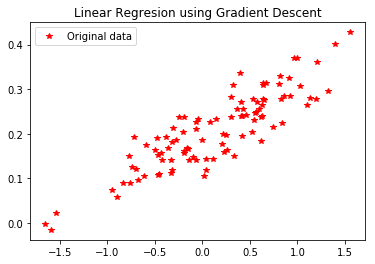

In [43]:
point_sum = 100
vectors = []

for i in range(point_sum):
    x1 = np.random.normal(0.0, 0.66)
    y1 =  0.1 * x1 + 0.2 + np.random.normal(0.0, 0.04)
    vectors.append([x1, y1])
x_data = [ v[0] for v in vectors]
y_data = [ v[1] for v in vectors]
plt.plot(x_data, y_data, 'r*', label='Original data')
plt.title('Linear Regresion using Gradient Descent')
plt.legend()
plt.show()

In [45]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

#loss function 
learning_rate = 0.5
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [58]:
_w = 0.0
_b = 0.0
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for step in range(20):
        sess.run(train)
        print('Step=%d, Loss=%f, [Weight=%f Bias=%f]' % (step, sess.run(loss), 
             sess.run(W), sess.run(b)) )
        
    _w = sess.run(W)
    _b = sess.run(b)
        

Step=0, Loss=0.074613, [Weight=0.522039 Bias=0.100068]
Step=1, Loss=0.026645, [Weight=0.352311 Bias=0.138174]
Step=2, Loss=0.010216, [Weight=0.253127 Bias=0.161113]
Step=3, Loss=0.004589, [Weight=0.195075 Bias=0.174518]
Step=4, Loss=0.002661, [Weight=0.161101 Bias=0.182364]
Step=5, Loss=0.002001, [Weight=0.141219 Bias=0.186956]
Step=6, Loss=0.001775, [Weight=0.129582 Bias=0.189643]
Step=7, Loss=0.001698, [Weight=0.122772 Bias=0.191216]
Step=8, Loss=0.001671, [Weight=0.118787 Bias=0.192136]
Step=9, Loss=0.001662, [Weight=0.116454 Bias=0.192675]
Step=10, Loss=0.001659, [Weight=0.115089 Bias=0.192990]
Step=11, Loss=0.001658, [Weight=0.114291 Bias=0.193175]
Step=12, Loss=0.001657, [Weight=0.113823 Bias=0.193283]
Step=13, Loss=0.001657, [Weight=0.113549 Bias=0.193346]
Step=14, Loss=0.001657, [Weight=0.113389 Bias=0.193383]
Step=15, Loss=0.001657, [Weight=0.113296 Bias=0.193405]
Step=16, Loss=0.001657, [Weight=0.113241 Bias=0.193417]
Step=17, Loss=0.001657, [Weight=0.113209 Bias=0.193425]
St

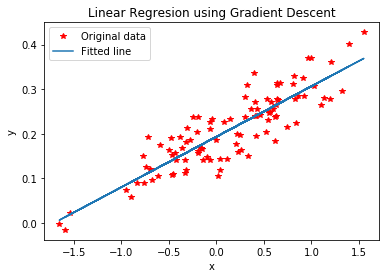

In [61]:
plt.plot(x_data, y_data, 'r*', label='Original data')
plt.plot(x_data, _w*x_data+_b, label='Fitted line')
plt.title('Linear Regresion using Gradient Descent')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 激活函数

In [2]:
x = np.linspace(-7, 7, 180)
def sigmoid(inputs):
    y = [1/float(1+np.exp(-x)) for x in inputs]
    return y

def relu(inputs):
    y = [x * (x>0) for x in inputs]
    return y

def tanh(inputs):
    y = [(np.exp(x) - np.exp(-x))/ float(np.exp(x) +np.exp(-x)) 
         for x in inputs]
    return y

def softplus(inputs):
    y = [np.log(1 + np.exp(x)) for x in inputs]
    return y 

In [17]:
y_sigmoid = tf.nn.sigmoid(x)
y_relu = tf.nn.relu(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

_y_sigmoid = []
_y_relu = []
_y_tanh = []
_y_softplus = []



print(sigmoid(x)[:4])
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    print(sess.run(y_sigmoid)[:4])
    _y_sigmoid = sess.run(y_sigmoid)
    _y_relu = sess.run(y_relu)
    _y_tanh = sess.run(y_tanh)
    _y_softplus = sess.run(y_softplus)


[0.0009110511944006454, 0.0009850941976634196, 0.0010651484124882544, 0.0011517007765964155]
[0.00091105 0.00098509 0.00106515 0.0011517 ]


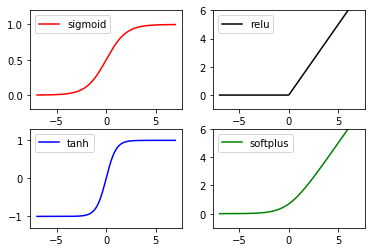

In [31]:
plt.subplot(221)
plt.plot(x, _y_sigmoid, c='red', label='sigmoid')
plt.ylim(-0.2, 1.2)
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, _y_relu, c='black', label='relu')
plt.ylim(-1, 6)
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, _y_tanh, c='blue', label='tanh')
plt.ylim(-1.3, 1.3)
plt.legend(loc='best')


plt.subplot(224)
plt.plot(x, _y_softplus, c='green', label='softplus')
plt.ylim(-1, 6)
plt.legend(loc='best')
plt.show()